In [1]:
# Titanic EDA Project 🚢

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set(style="whitegrid")

df = pd.read_csv("train.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Understanding the Data**

In [2]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [3]:
#missing values found for Cabin, Age and Embarked
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Managing Null Values**

In [5]:
#Dropping the Cabin column as there are too many null values 
#Deciding not to use this for our current analysis
titanic=df.copy()
titanic=df.drop(['Cabin'],axis=1)


In [6]:
#Embarked has only two missing values, let's fill them with its Mode
titanic['Embarked'].fillna(titanic['Embarked'].mode()[0])

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [7]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


**Now Let Us Manage the Null Values for Age**

In [8]:
#Group Wise mean w.r.t Pclass and Sex
titanic['Age'] = titanic.groupby(['Pclass', 'Sex'])['Age'].transform(lambda x: x.fillna(x.mean()))


In [9]:
titanic.isna().sum()
#All null values have been filled/dropped

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

**Make the Required Categorical Columns Numeric**

In [10]:
titanic['Sex']=titanic['Sex'].astype('category').cat.codes
#One-hot encoding Embarked
titanic = pd.get_dummies(titanic, columns=['Embarked'], drop_first=True)


**Generating Correlation Matrix**

In [11]:
selected_cols = ['Survived', 'Pclass', 'Age', 'Sex', 'Fare', 'SibSp', 'Parch']
correlation=titanic[selected_cols].corr()

<Axes: >

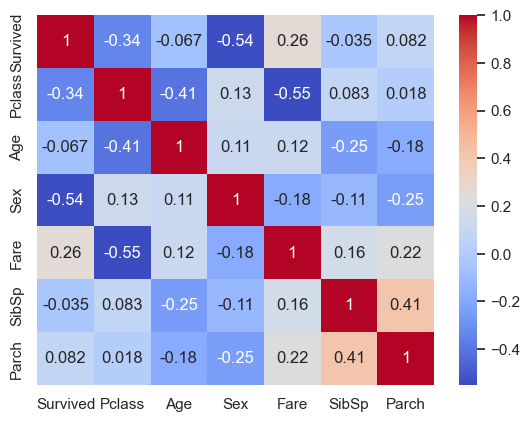

In [12]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')


*Survival is negatively correlated with Sex (-0.54), since females were encoded as 1, this implies females had a higher survival rate.*

*Survival and Pclass are negatively correlated (-0.34), showing higher class meant better survival.*

*Fare has a weak positive correlation (0.26) with survival, indicating that passengers who paid more (possibly for higher classes) had better odds.*

<Axes: xlabel='Pclass', ylabel='count'>

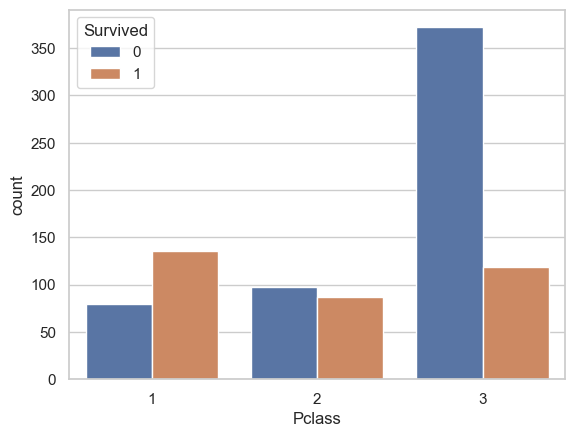

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=titanic)


*Passengers in 1st class had the highest survival rate, while 3rd class passengers had the highest number of deaths. This suggests a strong influence of socio-economic status, those who could afford higher class tickets had better access to lifeboats and assistance.*

<Axes: xlabel='Embarked', ylabel='count'>

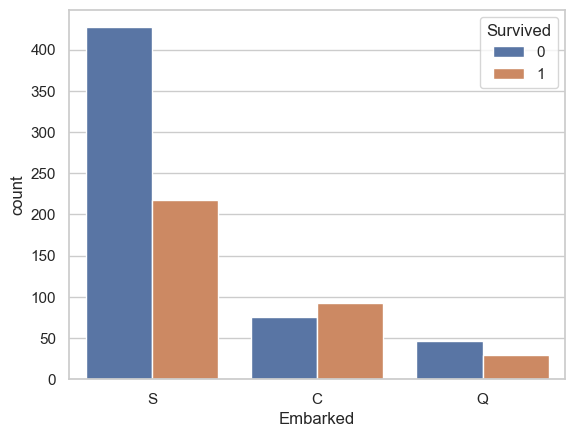

In [14]:
titanic_plot = titanic.copy()
titanic_plot['Embarked'] = pd.read_csv("train.csv")['Embarked']
sns.countplot(x='Embarked', hue='Survived', data=titanic_plot)

*Passengers who boarded at Cherbourg (C) had the highest survival rate, while those from Southampton (S) had the highest number of deaths. This might be because many 1st class passengers boarded at Cherbourg, while 3rd class passengers boarded at Southampton.*

<Axes: xlabel='Survived', ylabel='Age'>

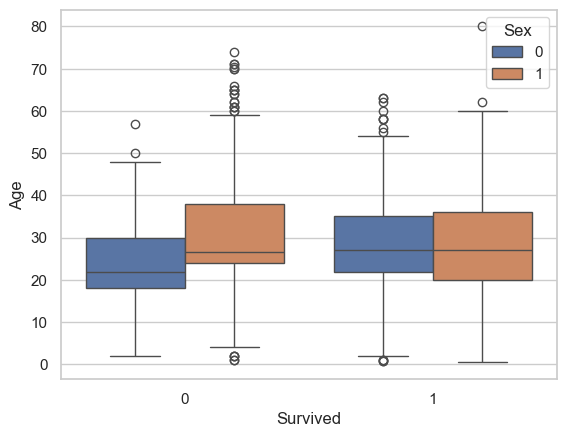

In [15]:
sns.boxplot(x='Survived', y='Age', hue='Sex', data=titanic)


*Among the survivors, females had a slightly higher median age than males. Survivors also had a wider range of ages compared to those who died. This reinforces the "women and children first" evacuation pattern, with young females and children being prioritized.*

<Axes: xlabel='Age', ylabel='Count'>

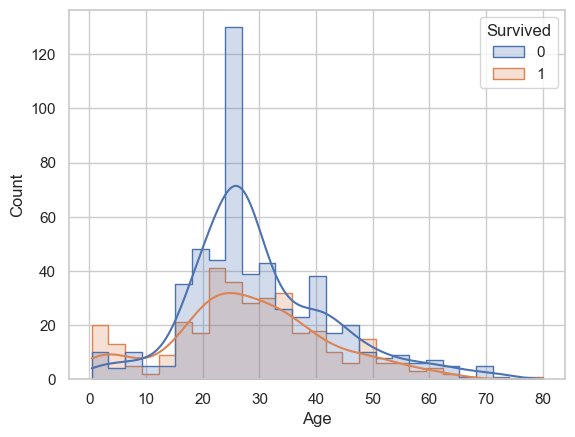

In [16]:
sns.histplot(data=titanic, x='Age', hue='Survived', kde=True, element='step')


*Most passengers were aged between 20 and 30. However, the survival distribution skews slightly younger, with children and young adults having a higher chance of survival. Elderly passengers were fewer and had a lower survival rate overall.*

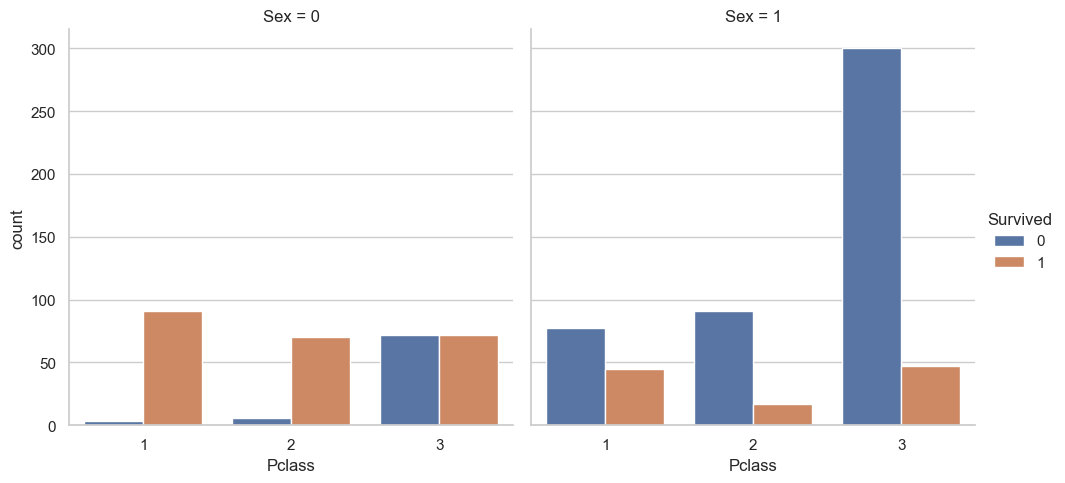

In [17]:
sns.catplot(x='Pclass', hue='Survived', col='Sex', kind='count', data=titanic)

*1st and 2nd class females had the highest survival counts, while 3rd class males had the highest death count. This clearly shows that gender alone wasn’t enough, class also played a major role in survival outcomes.*

**Predicting Survival: Logistic Regression**


Accuracy: 82.12 %

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



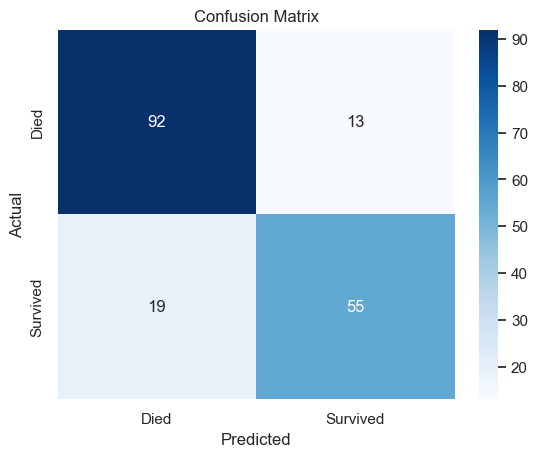

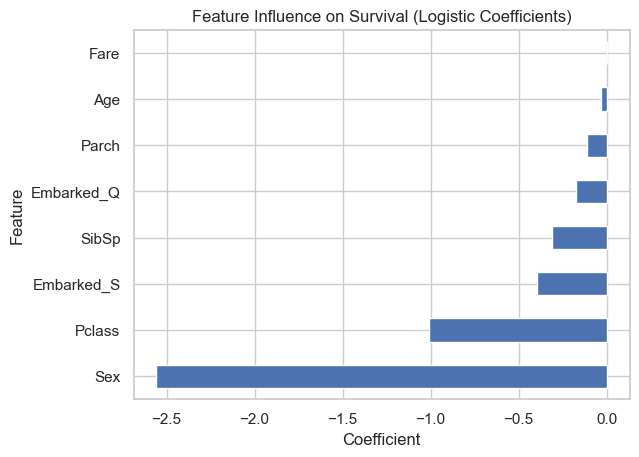

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Select Features
features = ['Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch', 'Embarked_Q', 'Embarked_S']
X = titanic[features]
y = titanic['Survived']

# 2. Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Train Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 4. Evaluate Model
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", round(accuracy * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Died', 'Survived'], yticklabels=['Died', 'Survived'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 6. Feature Importance
coefficients = pd.Series(model.coef_[0], index=X.columns)
coefficients.sort_values().plot(kind='barh')
plt.title('Feature Influence on Survival (Logistic Coefficients)')
plt.xlabel('Coefficient')
plt.ylabel('Feature')
plt.show()


In [23]:
#Save trained model
import joblib
joblib.dump(model, 'titanic_model.pkl')

#Save X_train for SHAP
joblib.dump(X_train, 'X_train.pkl')

['X_train.pkl']